<a href="https://colab.research.google.com/github/kelverssg/notebooks/blob/master/Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class Polynomial:
    '''
    Polynomial is a blueprint to generate polynomial functions as objects.
    
    To create an instance, pass the following arguments to each instance (lower_bound, upper_bound, highest_power, *optional_arguments):
      1, 2. The lower x-bound followed by the upper x-bound of the function
      3. Highest power of the polynomial function, e.g. 3 for a cubic function
      4 onwards. Pass a series of coefficients if you wish to modify the function from the default coefficient of 1 across the board,
      starting from the coefficient of the term with the highest power. Pass the value 0 as the coefficient of term(s) you wish to drop.
    '''

    def __init__(self, lower_bound, upper_bound, highest_power, *coeff_):
        import numpy as np
        if highest_power < 0: raise ValueError("highest_power must be more than 0.")
        if not isinstance(highest_power, int): raise TypeError("highest_power must be of type int.")
        self.highest_power = highest_power
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.coeff_ = list(coeff_)
        self.x = np.linspace(self.lower_bound,self.upper_bound,max(int(0.5*(self.upper_bound+self.lower_bound)/0.001),5000))
        self.coeff = [1 for i in range(self.highest_power+1)]
        try:
          for i, c in enumerate(self.coeff_):
            self.coeff[i] = c
        except: pass
        self.y_list = [a * self.x ** (self.highest_power - i) for i, a in enumerate(self.coeff)]
        self.y = sum(self.y_list)
        self.dydx_list = [(self.highest_power - i) * a * self.x ** (self.highest_power - i - 1) for i,a in enumerate(self.coeff[:-1])]
        self.dydx = sum(self.dydx_list)
        self.name = ''
        for i, a in enumerate(self.coeff):
          if i != 0: self.name += '+'
          self.name += f'{a}x^{self.highest_power-i}'
        self.name = self.name.replace('+-','-')
        self.name = self.name.replace('x^0','')
        self.dydx_name = ''
        for i, a in enumerate(self.coeff[:-1]):
          if i != 0: self.dydx_name += '+'
          self.dydx_name += f'{(self.highest_power - i) * a}x^{self.highest_power-i-1}'
        self.dydx_name = self.dydx_name.replace('+-','-')
        self.dydx_name = self.dydx_name.replace('x^0','')

    def plot_(self):
        '''A method that plots the polynomial function.'''

        import matplotlib.pyplot as plt
        import seaborn as sns
        sns.set_palette('bright',5)
        plt.figure(figsize=(15,15))
        plt.axhline(color='black')
        plt.axvline(color='black')
        plt.xlabel('x', ha = 'right')
        plt.ylabel('y', va = 'top')
        plt.grid(color='gray', linestyle='--')
        plt.text(self.upper_bound,self.y[-1],f'y={self.name}', ha = 'right')
        plt.plot(self.x,self.y, linewidth=2)

    def plot_dydx(self):
        '''A method that plots the derivative function of the polynomial function.'''

        import matplotlib.pyplot as plt
        import seaborn as sns
        sns.set_palette('bright',5)
        plt.axhline(color='black')
        plt.axvline(color='black')
        plt.xlabel('x', ha = 'right')
        plt.ylabel('y', va = 'top')
        plt.grid(color='gray', linestyle='--')
        plt.text(self.lower_bound,self.dydx[0],f'dy/dx={self.dydx_name}', ha = 'left')
        plt.plot(self.x,self.dydx)
    
    def plot_tangent(self, x):
      '''A method that plots the tangent at the designated point. Pass the x-value of said point to the method.'''
      
      y = sum([a * x ** (self.highest_power - i) for i, a in enumerate(self.coeff)])
      m = sum([(self.highest_power - i) * a * x ** (self.highest_power - i - 1) for i,a in enumerate(self.coeff[:-1])])
      c = y - m * x
      tangent_name = f'tangent, y={m}x+{c}'
      tangent_name = tangent_name.replace('+-','-')
      tangent_name = tangent_name.replace('x^0','')
      import matplotlib.pyplot as plt
      import seaborn as sns
      sns.set_palette('bright',5)
      plt.text(x, m*x+c, f'({x},{m*x+c})')
      plt.plot(x,m*x+c,'k.')
      plt.plot(self.x, m * self.x + c, color='green')
      plt.text(self.lower_bound,m * self.lower_bound + c,tangent_name, ha = 'left')

f is defined as 1x^3+0x^2+0x^1+0.


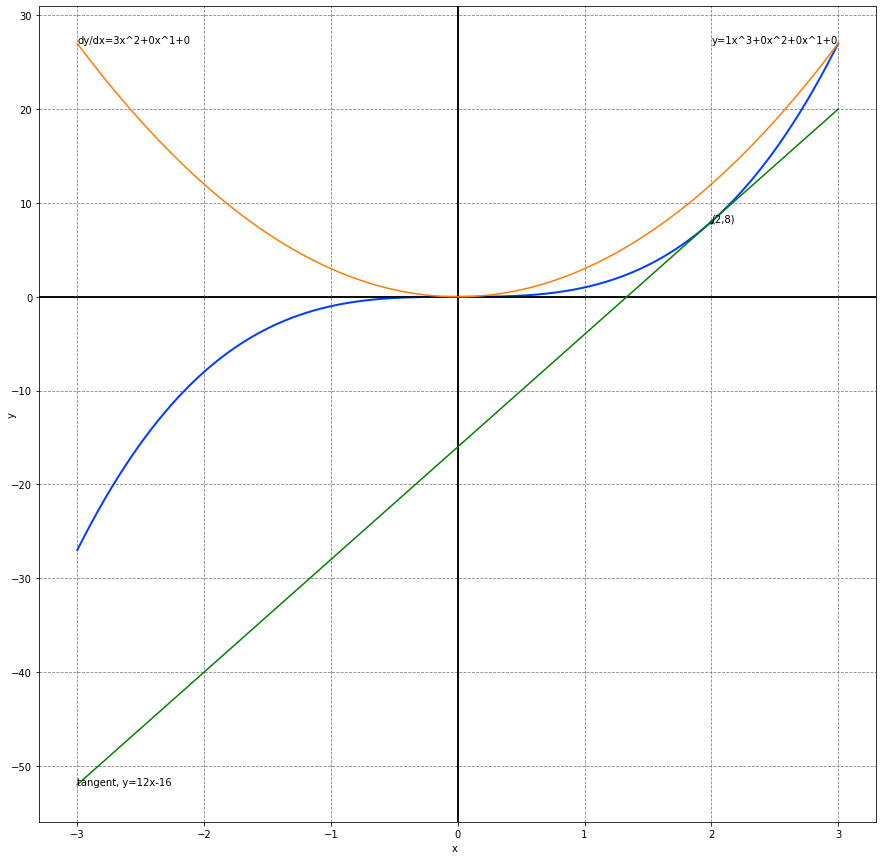

In [339]:
f = Polynomial(-3,3,3,1,0,0,0)
print(f'f is defined as {f.name}.')
f.plot_()
f.plot_dydx()
f.plot_tangent(2)

In [337]:
help(Polynomial)

Help on class Polynomial in module __main__:

class Polynomial(builtins.object)
 |  Polynomial is a blueprint to generate polynomial functions as objects.
 |  
 |  To create an instance, pass the following arguments to each instance (lower_bound, upper_bound, highest_power, *optional_arguments):
 |    1, 2. The lower x-bound followed by the upper x-bound of the function
 |    3. Highest power of the polynomial function, e.g. 3 for a cubic function
 |    4 onwards. Pass a series of coefficients if you wish to modify the function from the default coefficient of 1 across the board,
 |    starting from the coefficient of the term with the highest power. Pass the value 0 as the coefficient of term(s) you wish to drop.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lower_bound, upper_bound, highest_power, *coeff_)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot_(self)
 |      A method that plots the polynomial function.
 |  
 |  plot_dydx(self)
 |